# Run regrid operation on CORDEX

**Rooki** calls climate data operations on the **rook** processing service.

In [1]:
import os
os.environ['ROOK_URL'] = 'http://rook.dkrz.de/wps'

from rooki import rooki
from rooki import operators as ops

## Workflow: subset only

In [2]:
tas = ops.Input(
    'tas', ['c3s-cordex.output.EUR-11.MOHC.MOHC-HadGEM2-ES.rcp85.r1i1p1.MOHC-HadREM3-GA7-05.v1.mon.tas.v20200330']
)

wf = ops.Subset(tas, time="2030-01/2030-01")

In [3]:
resp = wf.orchestrate()
resp.ok 

True

In [4]:
ds = resp.datasets()[0]
ds

<xarray.Dataset>
Dimensions:                     (rlat: 412, rlon: 424, bnds: 2, time: 1,
                                 vertices: 4)
Coordinates:
    height                      float64 ...
    latitude                    (rlat, rlon) float64 ...
    longitude                   (rlat, rlon) float64 ...
  * rlat                        (rlat) float64 -23.37 -23.26 ... 21.73 21.84
  * rlon                        (rlon) float64 -28.38 -28.27 ... 18.04 18.15
  * time                        (time) object 2030-01-16 00:00:00
Dimensions without coordinates: bnds, vertices
Data variables:
    rlat_bnds                   (rlat, bnds) float64 ...
    rlon_bnds                   (rlon, bnds) float64 ...
    rotated_latitude_longitude  int32 ...
    tas                         (time, rlat, rlon) float32 ...
    time_bnds                   (time, bnds) object ...
    vertices_latitude           (rlat, rlon, vertices) float64 ...
    vertices_longitude          (rlat, rlon, vertices) float64 ...
Attributes: (12/22)
    model_id:                       MOHC-HadREM3-GA7-05
    driving_experiment_name:        rcp85
    creation_date:                  2020-02-05T17:15:43Z
    project_id:                     CORDEX
    experiment:                     rcp85 run using HadGEM2-ES as a driving m...
    institution:                    MetOffice, Hadley Centre, UK
    ...                             ...
    driving_model_id:               MOHC-HadGEM2-ES
    institute_id:                   MOHC
    frequency:                      mon
    history:                        Thu Mar 26 11:30:56 2020: ncatted -O -a t...
    NCO:                            4.7.3
    tracking_id:                    hdl:21.14103/994e527c-53df-4fb8-9768-ecc1...

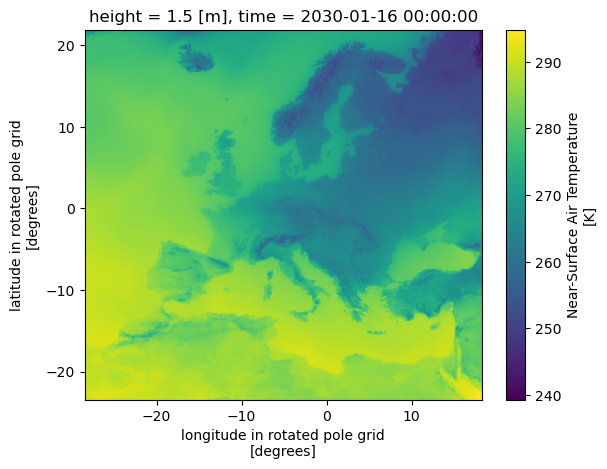

In [5]:
ds.tas.isel(time=0).plot()

## Parameters of regrid operation

In [6]:
rooki.regrid?

Signature: rooki.regrid(collection, method='nearest_s2d', grid='auto')
Docstring:
Run regridding operator on climate model data using daops (xarray).

Parameters
----------
collection : string
    A dataset identifier or list of comma separated identifiers. Example: c3s-cmip5.output1.ICHEC.EC-EARTH.historical.day.atmos.day.r1i1p1.tas.latest
method : {'nearest_s2d', 'bilinear', 'conservative', 'patch'}string
    Please specify regridding method like consevative or bilinear. Default: nearest_s2d
grid : {'auto', '0pt25deg', '0pt25deg_era5', '0pt5deg_lsm', '0pt625x0pt5deg', '0pt75deg', '1deg', '1pt25deg', '2pt5deg'}string
    Please specify output grid resolution for regridding. Default: auto

Returns
-------
output : ComplexData:mimetype:`application/metalink+xml; version=4.0`
    Metalink v4 document with references to NetCDF files.
prov : ComplexData:mimetype:`application/json`
    Provenance document using W3C standard.
prov_plot : ComplexData:mimetype:`image/png`
    Provenance docume

## workflow: subset + regrid


In [7]:
tas = ops.Input(
    'tas', ['c3s-cordex.output.EUR-11.MOHC.MOHC-HadGEM2-ES.rcp85.r1i1p1.MOHC-HadREM3-GA7-05.v1.mon.tas.v20200330']
)

wf = ops.Subset(tas, time="2030-01/2030-01")

wf = ops.Regrid(wf, method="nearest_s2d", grid="auto")

In [8]:
resp = wf.orchestrate()
resp.ok 

True

In [9]:
ds = resp.datasets()[0]
ds

<xarray.Dataset>
Dimensions:    (lat: 412, lon: 424, bnds: 2, time: 1)
Coordinates:
  * lat        (lat) float64 21.99 22.11 22.23 22.36 ... 72.22 72.34 72.46 72.59
  * lon        (lon) float64 -44.59 -44.33 -44.08 -43.82 ... 64.45 64.71 64.96
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    height     float64 ...
  * time       (time) object 2030-01-16 00:00:00
    time_bnds  (time, bnds) object ...
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 ...
Attributes: (12/27)
    model_id:                       MOHC-HadREM3-GA7-05
    driving_experiment_name:        rcp85
    creation_date:                  2020-02-05T17:15:43Z
    project_id:                     CORDEX
    experiment:                     rcp85 run using HadGEM2-ES as a driving m...
    institution:                    MetOffice, Hadley Centre, UK
    ...                             ...
    tracking_id:                    hdl:21.14103/994e527c-53df-4fb8-9768-ecc1...
    grid:                           regional regular_lat_lon 412x424 (174688 ...
    grid_label:                     gr
    regrid_operation:               nearest_s2d_412x424_412x424
    regrid_tool:                    xESMF_v0.8.6
    regrid_weights_uid:             95a894d5f89b99b6c8f9ba8baf7e1c5e_06f90897...

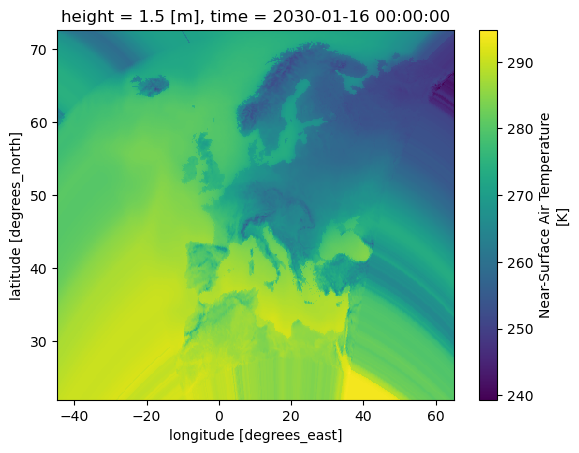

In [10]:
ds.tas.isel(time=0).plot()